In [1]:
import sys
sys.path.append('C:\\projects\\UTNCE\\src\\utnce')

In [2]:
from simplify import *
from prepare import *
from routing import *
from percolation_plot import *
from generate import *
from transfer import *

In [3]:
osm_path = "C:\\projects\\UTNCE\\data\\Amsterdam.large.pbf"

# Tram-Amsterdam

## Generate tram networks

In [4]:
city_tram_stations, edges, nodes, city_tram_routes = prepare_tram(osm_path)

topology: 100%|██████████████████████████████████████████████████████████████████| 2204/2204 [00:00<00:00, 4668.83it/s]


Calculate_degree possibly unhappy


In [5]:
city_tram_routes

,osm_id,route,to,name,ref,network,service,geometry
17,31398,tram,"Amsterdam, De Boelelaan/VU",Tram 24: Amsterdam Centraal Station => Amsterd...,24,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.89406 52.37387, 4.89361 52..."
18,31530,tram,"Amsterdam, Oudenaardeplantsoen",Tram 2: Amsterdam Centraal Station => Amsterda...,2,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.81102 52.34641, 4.81118 52..."
19,31794,tram,"Amsterdam, Drentepark",Tram 4: Amsterdam Centraal Station => Amsterda...,4,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.89406 52.37387, 4.89361 52..."
22,32579,tram,"Amsterdam, Osdorp Dijkgraafsplein",Tram 17: Amsterdam Centraal Station => Amsterd...,17,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.89915 52.37828, 4.89919 52..."
23,32615,tram,"Amsterdam, IJburg",Tram 26: Amsterdam Centraal Station => Amsterd...,26,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.90035 52.37793, 4.90035 52..."
24,32867,tram,"Amsterdam, Lambertus Zijlplein",Tram 13: Amsterdam Centraal Station => Amsterd...,13,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.89922 52.37830, 4.89926 52..."
390,4494870,tram,"Amsterdam, Centraal Station",Tram 4: Amsterdam Station RAI => Amsterdam Cen...,4,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.88956 52.33608, 4.88962 52..."
391,4497721,tram,"Amsterdam, Centraal Station",Tram 2: Amsterdam Nieuw Sloten => Amsterdam Ce...,2,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.80985 52.34614, 4.81032 52..."
392,4512710,tram,Amsterdam Centraal Station,Tram 13: Amsterdam Geuzenveld => Amsterdam Cen...,13,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.80291 52.37726, 4.80320 52..."
393,4513899,tram,"Amsterdam, Centraal Station",Tram 24: Amsterdam VUmc => Amsterdam Centraal ...,24,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.86582 52.33525, 4.86638 52..."


In [6]:
city_tram_routes = city_tram_routes.loc[city_tram_routes.ref != 'EMA']

In [7]:
city_tram_routes, check_name = check_tram_routes(city_tram_stations, city_tram_routes)

In [8]:
replacement_dict = {
    ',': '',
    'Diemen': '',
    'Amsterdam': '',
    'Sloterdijk': 'Station Sloterdijk',
    'Osdorp Dijkgraafsplein': 'Dijkgraafplein',
    'Osdorp De Aker': 'Matterhorn'
}

city_tram_stations, city_tram_routes, check_name = recheck_tram_routes(replacement_dict, city_tram_stations, city_tram_routes)

In [9]:
replacement_dict = {
    'Amstelveen Westwijk': 'Westwijk'
}

city_tram_stations, city_tram_routes, check_name = recheck_tram_routes(replacement_dict, city_tram_stations, city_tram_routes)

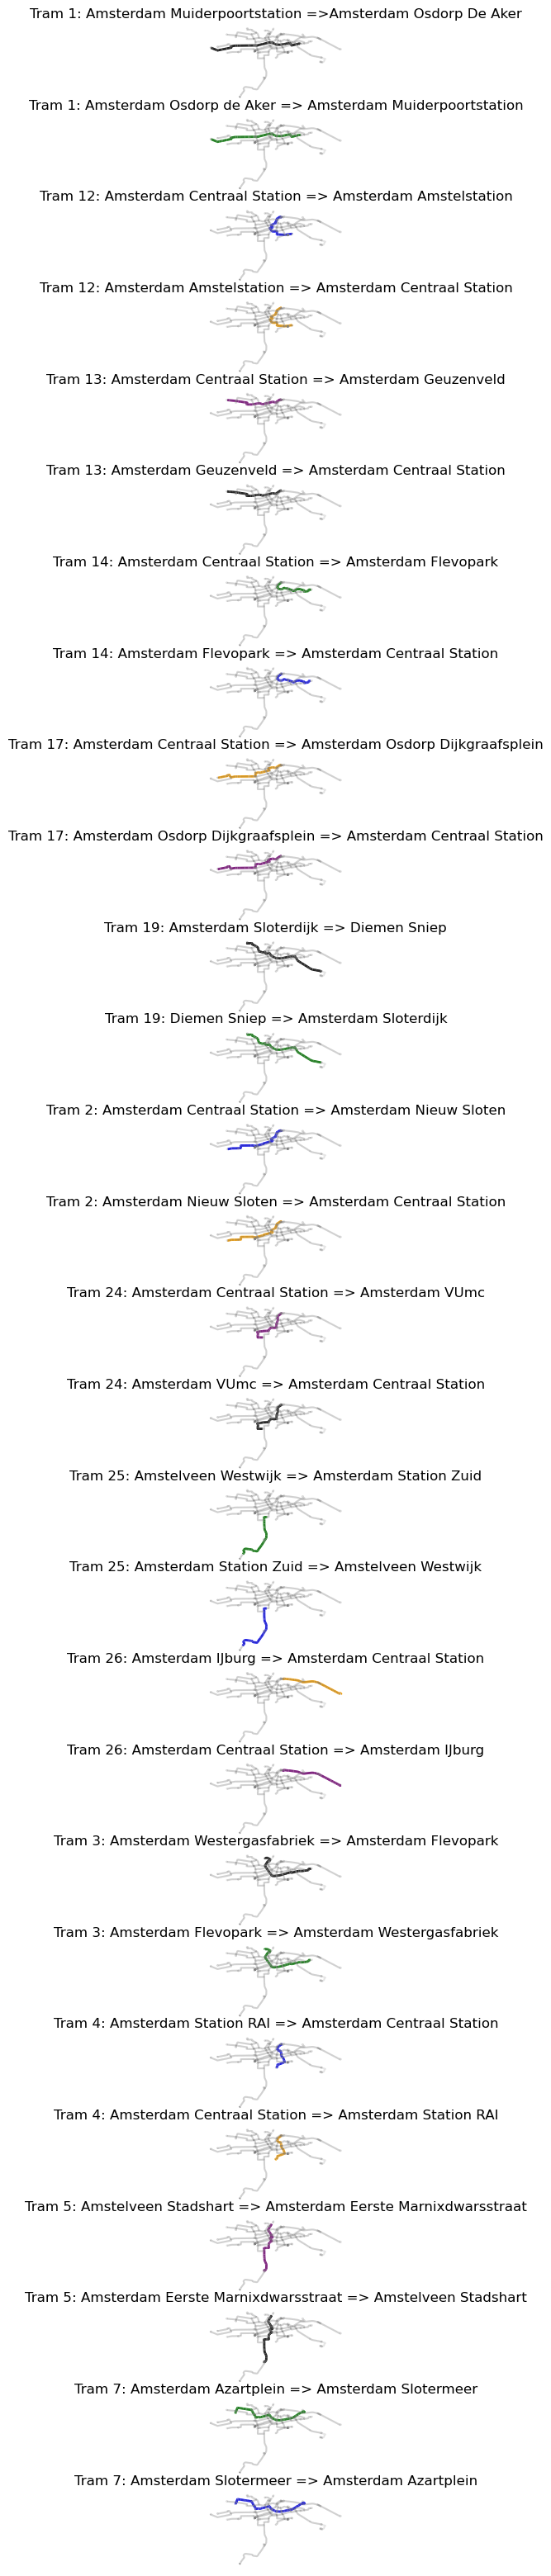

In [10]:
city_tram_order_route_dict, city_tram_shortest_path_pairs, city_tram_shortest_path_edges, tram_edges = tram(city_tram_stations, edges, nodes, city_tram_routes, city='Amsterdam')

## Add columns to nodes

In [11]:
city_tram_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(city_tram_order_route_dict, city_tram_routes)

In [12]:
city_tram_order_route_dict

{'Tram 1: Amsterdam Muiderpoortstation =>Amsterdam Osdorp De Aker':     id                              name                      geometry  \
 0   42                        Matterhorn  POINT (4.7745043 52.3538687)   
 1    8                           Pilatus   POINT (4.7770976 52.352828)   
 2    9                       Inaristraat  POINT (4.7836582 52.3501979)   
 3   39                          Ecuplein  POINT (4.7881565 52.3496994)   
 4   38                   Baden Powellweg  POINT (4.7944986 52.3509515)   
 5   36                          Hoekenes  POINT (4.8018381 52.3524376)   
 6   41                Louis Davidsstraat  POINT (4.8084929 52.3538423)   
 7   19                     Meer en Vaart    POINT (4.8099119 52.35637)   
 8   40                Johan Huizingalaan  POINT (4.8258953 52.3578123)   
 9   20                  Station Lelylaan  POINT (4.8337835 52.3579004)   
 10  12                 Derkinderenstraat  POINT (4.8397482 52.3579573)   
 11   2                     Surin

In [13]:
city_tram_new_nodes = add_columns_to_nodes(city_tram_order_route_dict, nodes)

In [14]:
city_tram_new_nodes

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
0,POINT (4.77450 52.35387),2,847,Matterhorn,4.774504,52.353869,"(4.7745043, 52.3538687)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,1,None
1,POINT (4.77710 52.35283),2,1615,Pilatus,4.777098,52.352828,"(4.7770976, 52.352828)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,1,None
2,POINT (4.78366 52.35020),2,1616,Inaristraat,4.783658,52.350198,"(4.7836582, 52.3501979)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,1,None
3,POINT (4.78816 52.34970),2,1777,Ecuplein,4.788157,52.349699,"(4.7881565, 52.3496994)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,1,None
4,POINT (4.79450 52.35095),2,1776,Baden Powellweg,4.794499,52.350952,"(4.7944986, 52.3509515)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 17","1, 17"
...,...,...,...,...,...,...,...,...,...,...,...
413,POINT (4.83829 52.37876),2,1659,Burgemeester de Vlugtlaan,4.838294,52.378758,"(4.8382938, 52.3787581)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,7,None
414,POINT (4.83324 52.37955),2,1668,Burgemeester Fockstraat,4.833240,52.379551,"(4.8332396, 52.3795507)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,7,None
415,POINT (4.82750 52.38045),2,1667,Burgemeester Eliasstraat,4.827504,52.380451,"(4.8275036, 52.3804505)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,7,None
416,POINT (4.82252 52.38123),2,1663,Plein '40-'45,4.822524,52.381225,"(4.8225241, 52.3812253)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,7,None


### retrive all transfer stations on each route

In [15]:
city_tram_transfer_stations_df = all_transfer_stations_df(city_tram_new_nodes)

In [21]:
city_tram_transfer_stations_df

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
0,POINT (4.79450 52.35095),2,1776,Baden Powellweg,4.794499,52.350952,"(4.7944986, 52.3509515)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 17","1, 17"
1,POINT (4.80184 52.35244),2,1686,Hoekenes,4.801838,52.352438,"(4.8018381, 52.3524376)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 17","1, 17"
2,POINT (4.80991 52.35637),2,1784,Meer en Vaart,4.809912,52.356370,"(4.8099119, 52.35637)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 17","1, 17"
3,POINT (4.82590 52.35781),2,1780,Johan Huizingalaan,4.825895,52.357812,"(4.8258953, 52.3578123)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 17, 2","1, 17, 2"
4,POINT (4.83378 52.35790),2,1786,Station Lelylaan,4.833784,52.357900,"(4.8337835, 52.3579004)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 17","1, 17"
...,...,...,...,...,...,...,...,...,...,...,...
61,POINT (4.87061 52.31608),2,1880,Kronenburg,4.870612,52.316077,"(4.8706118, 52.3160769)",Tram 25: Amstelveen Westwijk => Amsterdam Stat...,tram,"25, 5","25, 5"
62,POINT (4.87226 52.31219),2,1846,Zonnestein,4.872262,52.312186,"(4.8722618, 52.3121859)",Tram 25: Amstelveen Westwijk => Amsterdam Stat...,tram,"25, 5","25, 5"
63,POINT (4.87259 52.30809),2,1844,Onderuit,4.872593,52.308087,"(4.8725929, 52.3080875)",Tram 25: Amstelveen Westwijk => Amsterdam Stat...,tram,"25, 5","25, 5"
64,POINT (4.87187 52.30293),2,1703,Oranjebaan,4.871875,52.302928,"(4.8718747, 52.3029279)",Tram 25: Amstelveen Westwijk => Amsterdam Stat...,tram,"25, 5","25, 5"


In [16]:
len(city_tram_transfer_stations_df)

66

## Add columns to edges

In [17]:
city_tram_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(city_tram_shortest_path_edges, city_tram_routes)

In [18]:
city_tram_shortest_path_edges

{'Tram 1: Amsterdam Muiderpoortstation =>Amsterdam Osdorp De Aker':        osm_id                                           geometry railway  \
 0   322841927  LINESTRING (4.7770976 52.352828, 4.7768625 52....    tram   
 1   322841927  LINESTRING (4.7836582 52.3501979, 4.7833776 52...    tram   
 2    26594761  LINESTRING (4.785218 52.3495798, 4.7849725 52....    tram   
 3   322841907  LINESTRING (4.7881565 52.3496994, 4.7880725 52...    tram   
 4   322841927  LINESTRING (4.7849725 52.3496771, 4.7836582 52...    tram   
 ..        ...                                                ...     ...   
 91  770438581  LINESTRING (4.9289422 52.3609314, 4.9288413 52...    tram   
 92    7045610  LINESTRING (4.9324018 52.3610615, 4.932387 52....    tram   
 93  770429442  LINESTRING (4.9326128 52.3607965, 4.9325204 52...    tram   
 94  770429442  LINESTRING (4.9325122 52.3609243, 4.9324018 52...    tram   
 95  770438581  LINESTRING (4.9321097 52.361227, 4.9305569 52....    tram   
 
    ser

In [19]:
city_tram_new_edges = add_columns_to_edges(city_tram_shortest_path_edges,edges)

In [20]:
city_tram_new_edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight,route_name_list,route,ref
0,7045610,"LINESTRING (4.9324018 52.3610615, 4.932387 52....",tram,None,0,0,1,28.561299,0.002040,28,"(0, 1)","(1, 0)",1.0,Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,1
1,7045616,"LINESTRING (4.934085 52.3609657, 4.9340765 52....",tram,None,1,2,3,146.082551,0.010434,146,"(2, 3)","(3, 2)",NaN,NaN,NaN,NaN
2,7045675,"LINESTRING (4.9337809 52.3611734, 4.9339017 52...",tram,None,2,4,5,390.987463,0.027928,390,"(4, 5)","(5, 4)",1.0,Tram 3: Amsterdam Westergasfabriek => Amsterda...,tram,3
3,7045689,"LINESTRING (4.9394 52.361617, 4.9385742 52.361...",tram,None,3,6,7,345.247175,0.024661,345,"(6, 7)","(7, 6)",1.0,Tram 3: Amsterdam Flevopark => Amsterdam Weste...,tram,3
4,7045994,"LINESTRING (4.9157261 52.365067, 4.9157046 52....",tram,None,4,8,1730,35.152166,0.002511,35,"(8, 1730)","(1730, 8)",1.0,Tram 14: Amsterdam Flevopark => Amsterdam Cent...,tram,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2199,1185084715,"LINESTRING (4.8520736 52.3479443, 4.8521852 52...",tram,None,2199,1496,594,11.280287,0.000806,11,"(1496, 594)","(594, 1496)",NaN,NaN,NaN,NaN
2200,1185084716,"LINESTRING (4.852325 52.3480075, 4.852489 52.3...",tram,None,2200,562,1072,12.010525,0.000858,12,"(562, 1072)","(1072, 562)",NaN,NaN,NaN,NaN
2201,1185084717,"LINESTRING (4.8516012 52.3470208, 4.8519064 52...",tram,None,2201,1497,561,81.765515,0.005840,81,"(1497, 561)","(561, 1497)",NaN,NaN,NaN,NaN
2202,1185084718,"LINESTRING (4.8522982 52.348033, 4.8524709 52....",tram,None,2202,566,1079,12.587379,0.000899,12,"(566, 1079)","(1079, 566)",NaN,NaN,NaN,NaN


## Test 1: Amsterdam 1 -- s-no transfer, e-transfer, s_e has one same route

### Change coordinates dictionary of s_e points into two Dataframes of s_e nodes

In [33]:
s_e_coordinates_t3 = {
    's_coordinates_x': 4.816941988672407, 
    's_coordinates_y': 52.36594888564495, 
    'e_coordinates_x': 4.850845096317399, 
    'e_coordinates_y': 52.3751369796771
} 

In [34]:
start_node, end_node = s_e_node_df(s_e_coordinates_t3, city_tram_new_nodes)

In [35]:
start_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
383,POINT (4.81860 52.37284),2,222,Sloterpark,4.818602,52.372845,"(4.8186019, 52.3728449)",Tram 7: Amsterdam Azartplein => Amsterdam Slot...,tram,7,None


In [36]:
end_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
391,POINT (4.84859 52.37333),2,1642,Jan van Galenstraat,4.848589,52.373332,"(4.8485891, 52.3733319)",Tram 7: Amsterdam Azartplein => Amsterdam Slot...,tram,"13, 19, 7","13, 19, 7"


### Find the route which the s_e nodes are on----compare with new_edges instead of routes dataframe, should compare with routes dataframe

In [37]:
s_on_route_ref,e_on_route_ref = s_e_on_route_ref(start_node, end_node)

### Make judgement of s_e_on_route_ref

In [38]:
s_on_route_ref, e_on_route_ref = judge_on_route(s_on_route_ref, e_on_route_ref)

One of e_on_route is the same as s_on_route 

The next step is to find the same route----using function 's_e_same_routes'


### Find those same routes

In [39]:
s_e_same_routes_df = s_e_same_routes(s_on_route_ref,e_on_route_ref)
s_e_same_routes_df

s_node and e_node are on same route/routes:  ref
0   7



,ref
0,7


### Get all stations between s_e nodes and transfer nodes

In [40]:
all_stations_on_matched_routes_dfs = all_stations_on_matched_routes(s_e_same_routes_df,city_tram_routes,start_node,end_node,city_tram_order_route_dict)
all_stations_on_matched_routes_dfs

[    id                       name                      geometry     geo_x  \
 0   47                 Sloterpark  POINT (4.8186019 52.3728449)  4.818602   
 1   10   Burgemeester Roëllstraat  POINT (4.8187509 52.3750672)  4.818751   
 2   43              Plein '40-'45  POINT (4.8211591 52.3808373)  4.821159   
 3   45   Burgemeester Eliasstraat    POINT (4.8258104 52.38075)   4.82581   
 4   13    Burgemeester Fockstraat  POINT (4.8312794 52.3798913)  4.831279   
 5   15  Burgemeester de Vlugtlaan   POINT (4.8372054 52.378963)  4.837205   
 6   41         Bos en Lommerplein  POINT (4.8449335 52.3777823)  4.844933   
 7   55              Erasmusgracht  POINT (4.8469734 52.3763312)  4.846973   
 8   11        Jan van Galenstraat  POINT (4.8485891 52.3733319)  4.848589   
 9   57              Mercatorplein  POINT (4.8499792 52.3706818)  4.849979   
 10  56          W. Schoutenstraat   POINT (4.852596 52.3669952)  4.852596   
 11   1                 Postjesweg  POINT (4.8531786 52.3647729)

In [41]:
btw_stations_each_way_list = btw_stations_each_way_list(start_node,end_node,all_stations_on_matched_routes_dfs)
btw_stations_each_way_list

[   id                       name                      geometry     geo_x  \
 0  47                 Sloterpark  POINT (4.8186019 52.3728449)  4.818602   
 1  10   Burgemeester Roëllstraat  POINT (4.8187509 52.3750672)  4.818751   
 2  43              Plein '40-'45  POINT (4.8211591 52.3808373)  4.821159   
 3  45   Burgemeester Eliasstraat    POINT (4.8258104 52.38075)   4.82581   
 4  13    Burgemeester Fockstraat  POINT (4.8312794 52.3798913)  4.831279   
 5  15  Burgemeester de Vlugtlaan   POINT (4.8372054 52.378963)  4.837205   
 6  41         Bos en Lommerplein  POINT (4.8449335 52.3777823)  4.844933   
 7  55              Erasmusgracht  POINT (4.8469734 52.3763312)  4.846973   
 8  11        Jan van Galenstraat  POINT (4.8485891 52.3733319)  4.848589   
 
        geo_y                                    route_name_list ref route  \
 0  52.372845  Tram 7: Amsterdam Azartplein => Amsterdam Slot...   7  tram   
 1  52.375067  Tram 7: Amsterdam Azartplein => Amsterdam Slot...   7  tr

### Get all nodes and id_pairs of nodes between s_e nodes

In [42]:
btw_all_id_pairs_list = btw_all_ids_pairs(btw_stations_each_way_list,city_tram_new_nodes)
btw_all_id_pairs_list

[   s_id  e_id
 0   222  1641
 1  1641  1660
 2  1660  1665
 3  1665  1658
 4  1658  1661
 5  1661  1656
 6  1656  1833
 7  1833  1642]

### Calculate shortest path and plot

In [43]:
btw_all_id_pairs_list_unique = drop_df_in_list(btw_all_id_pairs_list)

All dataframes in the list are the same


In [44]:
btw_all_id_pairs_list_unique

[   s_id  e_id
 0   222  1641
 1  1641  1660
 2  1660  1665
 3  1665  1658
 4  1658  1661
 5  1661  1656
 6  1656  1833
 7  1833  1642]

In [45]:
G = create_ground_graph(edges, nodes)

In [46]:
shortest_path_pairs_way = all_shortest_paths(G, btw_all_id_pairs_list_unique[0], edges)

In [47]:
shortest_path_pairs_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
496,144719687,"LINESTRING (4.8182425 52.3725701, 4.8183616 52...",tram,None,496,218,222,43.890304,0.003135,43,"(218, 222)","(222, 218)"
1098,326923964,"LINESTRING (4.8187509 52.3750672, 4.8183147 52...",tram,None,1098,1641,218,303.034667,0.021645,303,"(1641, 218)","(218, 1641)"
260,27124074,"LINESTRING (4.818684 52.3759149, 4.8186147 52....",tram,None,260,307,308,36.087729,0.002578,36,"(307, 308)","(308, 307)"
261,27124075,"LINESTRING (4.8185658 52.3756232, 4.8186212 52...",tram,None,261,308,309,16.673519,0.001191,16,"(308, 309)","(309, 308)"
264,27124078,"LINESTRING (4.818899 52.375991, 4.8187964 52.3...",tram,None,264,306,307,16.912756,0.001208,16,"(306, 307)","(307, 306)"
1041,324264744,"LINESTRING (4.8211591 52.3808373, 4.8206528 52...",tram,None,1041,1660,306,565.292290,0.040378,565,"(1660, 306)","(306, 1660)"
1097,326923964,"LINESTRING (4.8186918 52.3754947, 4.8187184 52...",tram,None,1097,309,1641,49.918247,0.003566,49,"(309, 1641)","(1641, 309)"
905,323258166,"LINESTRING (4.8258104 52.38075, 4.8243313 52.3...",tram,None,905,1665,886,300.529728,0.021466,300,"(1665, 886)","(886, 1665)"
1040,324264744,"LINESTRING (4.8215284 52.3813703, 4.8214937 52...",tram,None,1040,886,1660,66.777683,0.004770,66,"(886, 1660)","(1660, 886)"
904,323258166,"LINESTRING (4.8312794 52.3798913, 4.8271043 52...",tram,None,904,1658,1665,384.391344,0.027457,384,"(1658, 1665)","(1665, 1658)"


In [48]:
duplicate_row_count_way, shortest_path_edges_way, edges_way = edges_with_count_weight(shortest_path_pairs_way, edges)

In [49]:
shortest_path_edges_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight
0,144719687,"LINESTRING (4.8182425 52.3725701, 4.8183616 52...",tram,None,496,218,222,43.890304,0.003135,43,"(218, 222)","(222, 218)",1.0
1,326923964,"LINESTRING (4.8187509 52.3750672, 4.8183147 52...",tram,None,1098,1641,218,303.034667,0.021645,303,"(1641, 218)","(218, 1641)",1.0
2,27124074,"LINESTRING (4.818684 52.3759149, 4.8186147 52....",tram,None,260,307,308,36.087729,0.002578,36,"(307, 308)","(308, 307)",1.0
3,27124075,"LINESTRING (4.8185658 52.3756232, 4.8186212 52...",tram,None,261,308,309,16.673519,0.001191,16,"(308, 309)","(309, 308)",1.0
4,27124078,"LINESTRING (4.818899 52.375991, 4.8187964 52.3...",tram,None,264,306,307,16.912756,0.001208,16,"(306, 307)","(307, 306)",1.0
5,324264744,"LINESTRING (4.8211591 52.3808373, 4.8206528 52...",tram,None,1041,1660,306,565.292290,0.040378,565,"(1660, 306)","(306, 1660)",1.0
6,326923964,"LINESTRING (4.8186918 52.3754947, 4.8187184 52...",tram,None,1097,309,1641,49.918247,0.003566,49,"(309, 1641)","(1641, 309)",1.0
7,323258166,"LINESTRING (4.8258104 52.38075, 4.8243313 52.3...",tram,None,905,1665,886,300.529728,0.021466,300,"(1665, 886)","(886, 1665)",1.0
8,324264744,"LINESTRING (4.8215284 52.3813703, 4.8214937 52...",tram,None,1040,886,1660,66.777683,0.004770,66,"(886, 1660)","(1660, 886)",1.0
9,323258166,"LINESTRING (4.8312794 52.3798913, 4.8271043 52...",tram,None,904,1658,1665,384.391344,0.027457,384,"(1658, 1665)","(1665, 1658)",1.0


In [50]:
shortest_path_edges_way.time.sum()

0.23977664379048358

<Axes: >

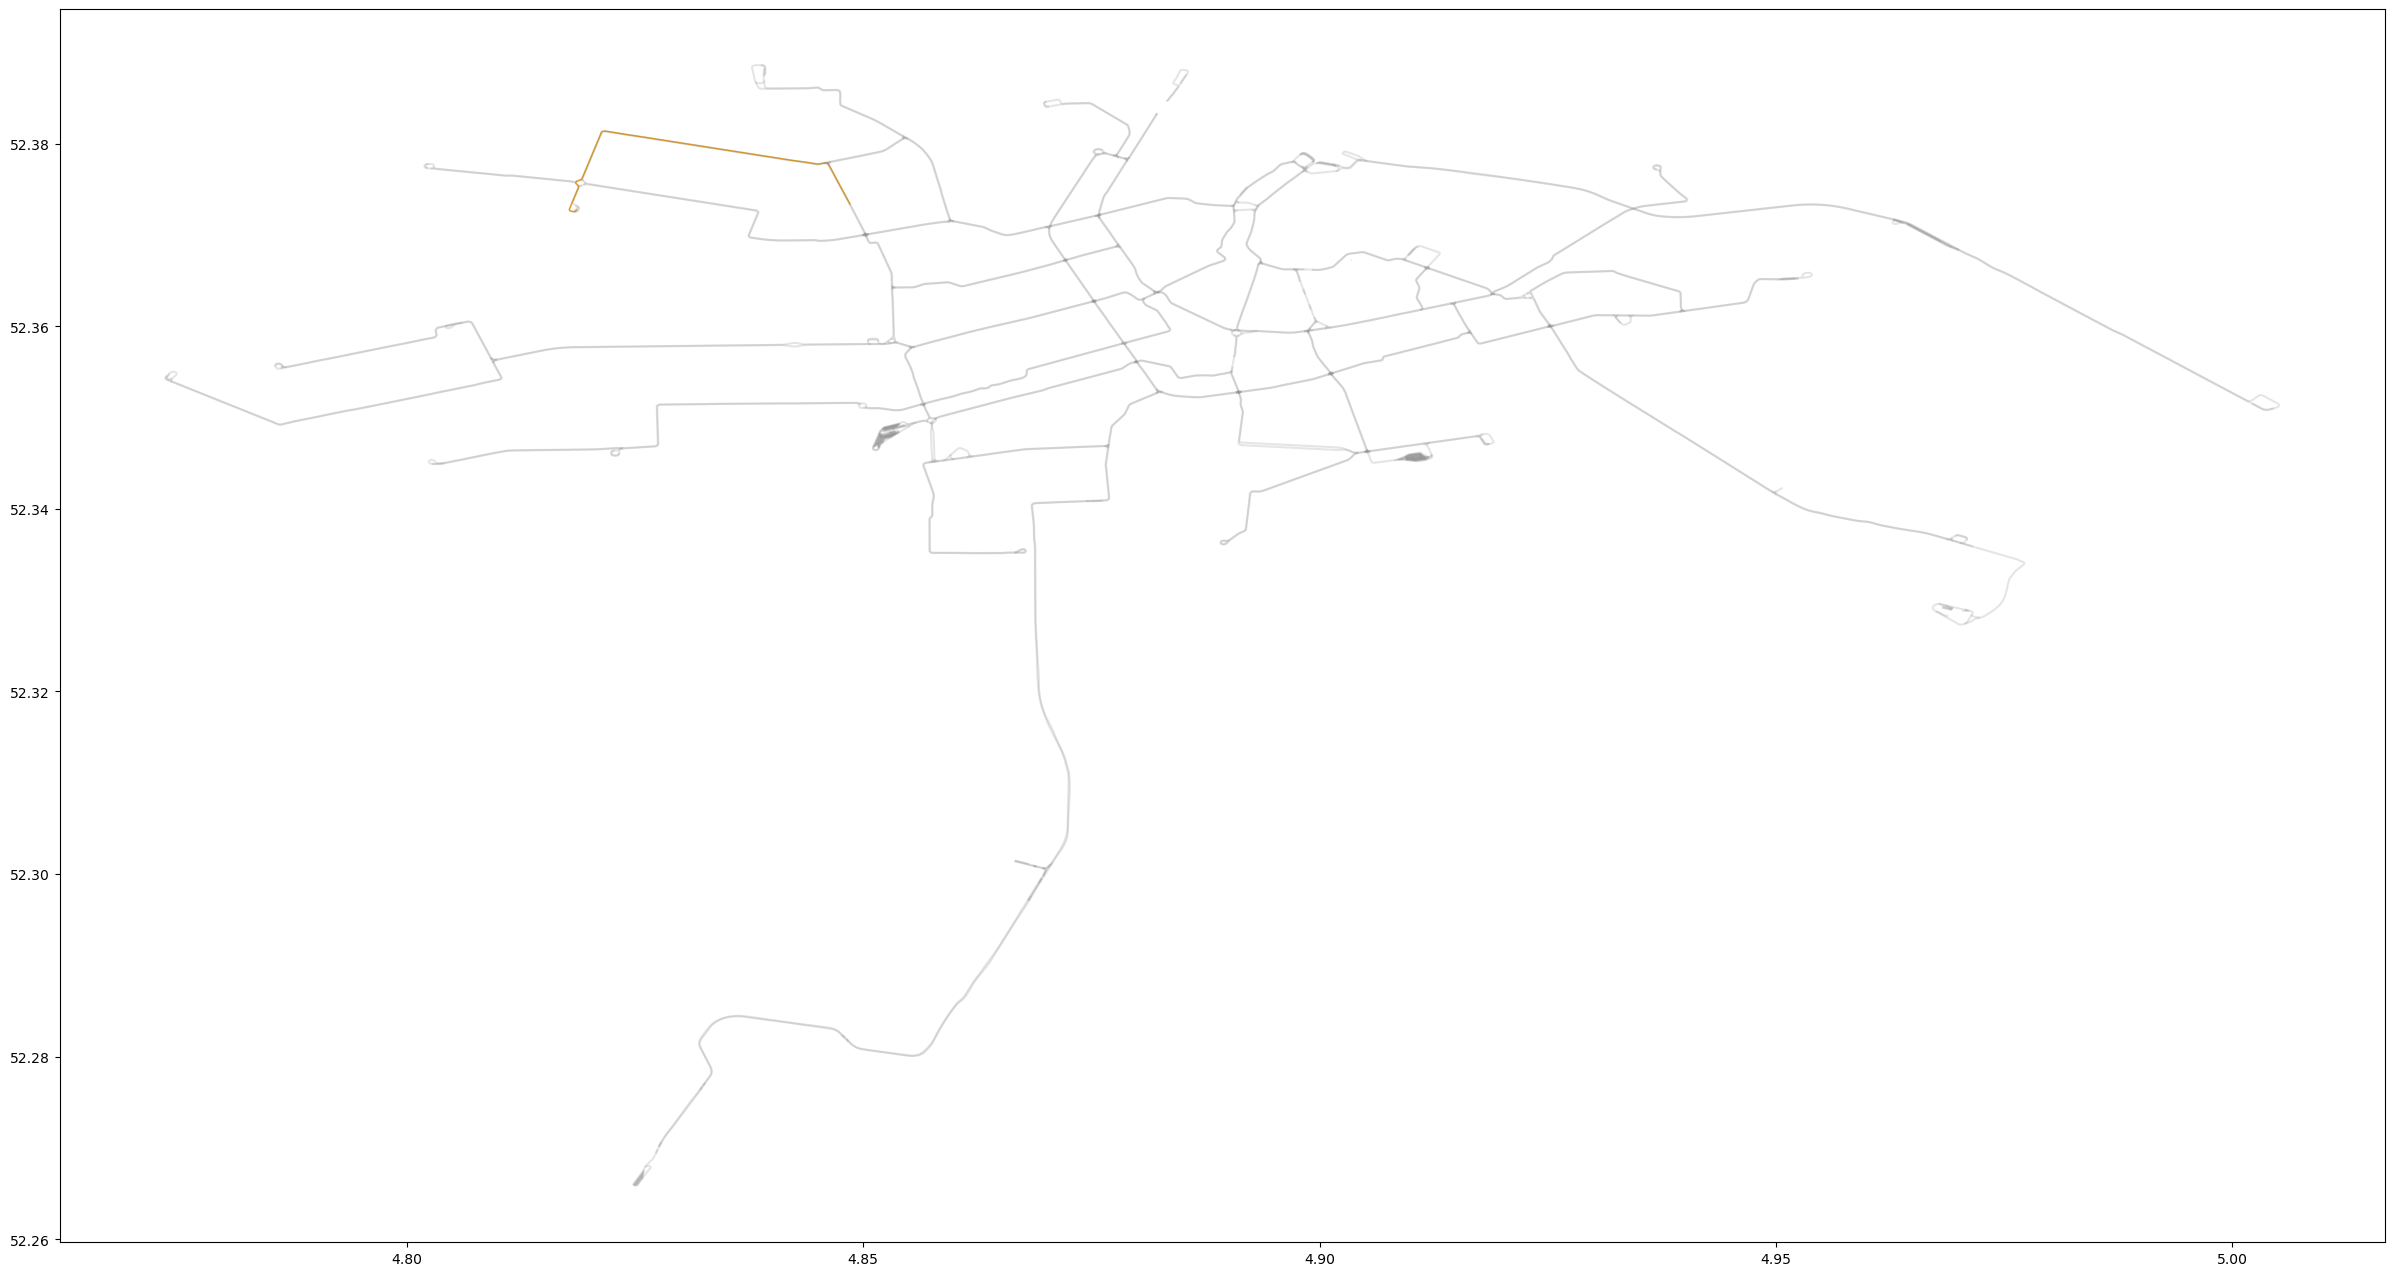

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(30, 20))

gpd.GeoDataFrame(city_tram_new_edges.copy()).plot(ax=ax, color='gray', alpha=0.2)

gpd.GeoDataFrame(shortest_path_edges_way.copy()).plot(ax=ax, zorder=1, linewidth=(shortest_path_edges_way.count_weight), color='orange')